###Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Loading data set from kaggle

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "Your Kaggle Username"
os.environ['KAGGLE_KEY'] = "Your Kaggle API Key"

Downloading data set from kaggle

In [3]:
!pip install -q kaggle
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [00:42<00:00, 242MB/s]
100% 2.70G/2.70G [00:42<00:00, 68.5MB/s]


unzip the data set

In [4]:
!unzip -q new-plant-diseases-dataset.zip

###Keras Image data loading


Training set

In [5]:
trainset = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
training = tf.keras.utils.image_dataset_from_directory(
    trainset,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


Validation set

In [6]:
validation = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
validation = tf.keras.utils.image_dataset_from_directory(
    validation,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


### Building the model

In [7]:
model = tf.keras.models.Sequential()

**Layers of CNN**

In [8]:
#Convolution layer (CONV)
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

#Pooling (POOL)
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Convolution layer (CONV)
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))

#Pooling (POOL)
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
#Convolution layer (CONV)
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))

#Pooling (POOL)
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
#Convolution layer (CONV)
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))

#Pooling (POOL)
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(tf.keras.layers.Dropout(0.25))

In [14]:
model.add(tf.keras.layers.Flatten())

In [15]:
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
model.add(tf.keras.layers.Dropout(0.4))

In [17]:
#output layer
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

###Training model

In [20]:
trainingHistory = model.fit(x=training, validation_data=validation,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 158s 66ms/step - accuracy: 0.4106 - loss: 2.0991 - val_accuracy: 0.8354 - val_loss: 0.5234
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.8391 - loss: 0.5164 - val_accuracy: 0.8943 - val_loss: 0.3377
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9060 - loss: 0.2923 - val_accuracy: 0.9313 - val_loss: 0.2145
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 59ms/step - accuracy: 0.9320 - loss: 0.2063 - val_accuracy: 0.9401 - val_loss: 0.1889
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.9524 - loss: 0.1467 - val_accuracy: 0.9563 - val_loss: 0.1332
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.9626 - loss: 0.1140 - val_accuracy: 0.9545 - val_loss: 0.1545
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.9694 - loss: 0.0893 - val_accuracy: 0.9573 - val_loss: 0.1391
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 59ms/step - accuracy: 

###Model Evaluation

In [21]:
loss, accuracy = model.evaluate(training)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.9904 - loss: 0.0280


In [22]:
print(loss, accuracy)

0.02451171725988388 0.9920336008071899


In [23]:
valLoss, valAccuracy = model.evaluate(validation)
print(valLoss, valAccuracy)

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9664 - loss: 0.1126
0.11167021840810776 0.9672206044197083


###Saving Model

In [24]:
model.save("model.keras")

###Recording model history in json

In [25]:
trainingHistory.history

{'accuracy': [0.6078810691833496,
  0.859691321849823,
  0.9138772487640381,
  0.9385305047035217,
  0.9547336101531982,
  0.9654456377029419,
  0.9713777899742126,
  0.976456344127655,
  0.9800270199775696,
  0.9815776348114014],
 'loss': [1.3350510597229004,
  0.4414832293987274,
  0.26652777194976807,
  0.1878756880760193,
  0.13738523423671722,
  0.10698717832565308,
  0.08425015211105347,
  0.07140634953975677,
  0.0630025565624237,
  0.05549534782767296],
 'val_accuracy': [0.8353630900382996,
  0.8943204879760742,
  0.9313111901283264,
  0.9400750994682312,
  0.9562941193580627,
  0.9545299410820007,
  0.9572615623474121,
  0.9690985679626465,
  0.9560664892196655,
  0.9672206044197083],
 'val_loss': [0.5233678221702576,
  0.3376944959163666,
  0.21452578902244568,
  0.18885064125061035,
  0.13320881128311157,
  0.15453661978244781,
  0.1391444355249405,
  0.10412212461233139,
  0.14839331805706024,
  0.11167027056217194]}

In [26]:
import json
with open('trainingHistory.json','w') as f:
  json.dump(trainingHistory.history,f)

#Accuracy Visualization

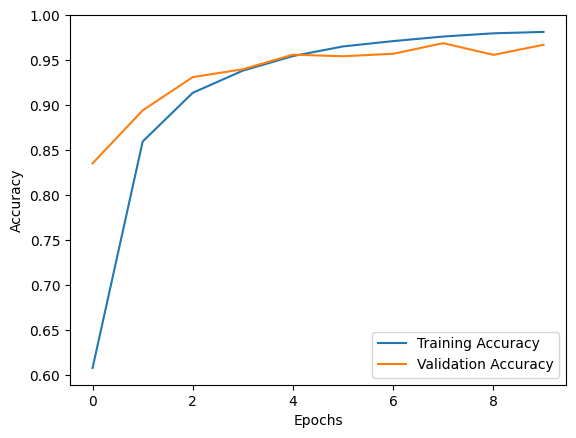

In [27]:
epochs = [i for i in range(10)]
plt.plot(epochs,trainingHistory.history['accuracy'],label='Training Accuracy')
plt.plot(epochs,trainingHistory.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###matrix

In [28]:
class_name = validation.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [29]:
validation = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_set = tf.keras.utils.image_dataset_from_directory(
    validation,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step


(array([[9.9999928e-01, 7.1741425e-07, 2.6324150e-09, ..., 1.5207919e-14,
         1.1195713e-13, 8.6743817e-13],
        [9.9999988e-01, 6.4124031e-08, 2.4724360e-09, ..., 3.6161289e-15,
         4.4382809e-14, 2.4119164e-13],
        [9.9999964e-01, 1.4696452e-07, 1.6054090e-08, ..., 6.5542136e-14,
         7.0383434e-13, 1.1337579e-11],
        ...,
        [2.8740201e-11, 2.2784663e-13, 3.6500927e-10, ..., 7.6985855e-11,
         5.0188517e-11, 9.9999988e-01],
        [2.1457849e-12, 2.2006346e-15, 1.7175776e-10, ..., 7.3820017e-10,
         7.5419518e-11, 9.9999976e-01],
        [5.8111658e-14, 7.7523433e-17, 1.1148911e-15, ..., 1.4127285e-16,
         6.9202531e-14, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [31]:
predicted_cat = tf.argmax(y_pred, axis=1)
predicted_cat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [32]:
true_cat = tf.concat([y for x, y in test_set], axis=0)
true_cat

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [33]:
y_true = tf.argmax(true_cat, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_true,predicted_cat, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.96      0.97       504
                                 Apple___Black_rot       1.00      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.99      0.92      0.95       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

###Confusion Matrix Visualization

In [35]:
cn = confusion_matrix(y_true,predicted_cat)
cn.shape

(38, 38)

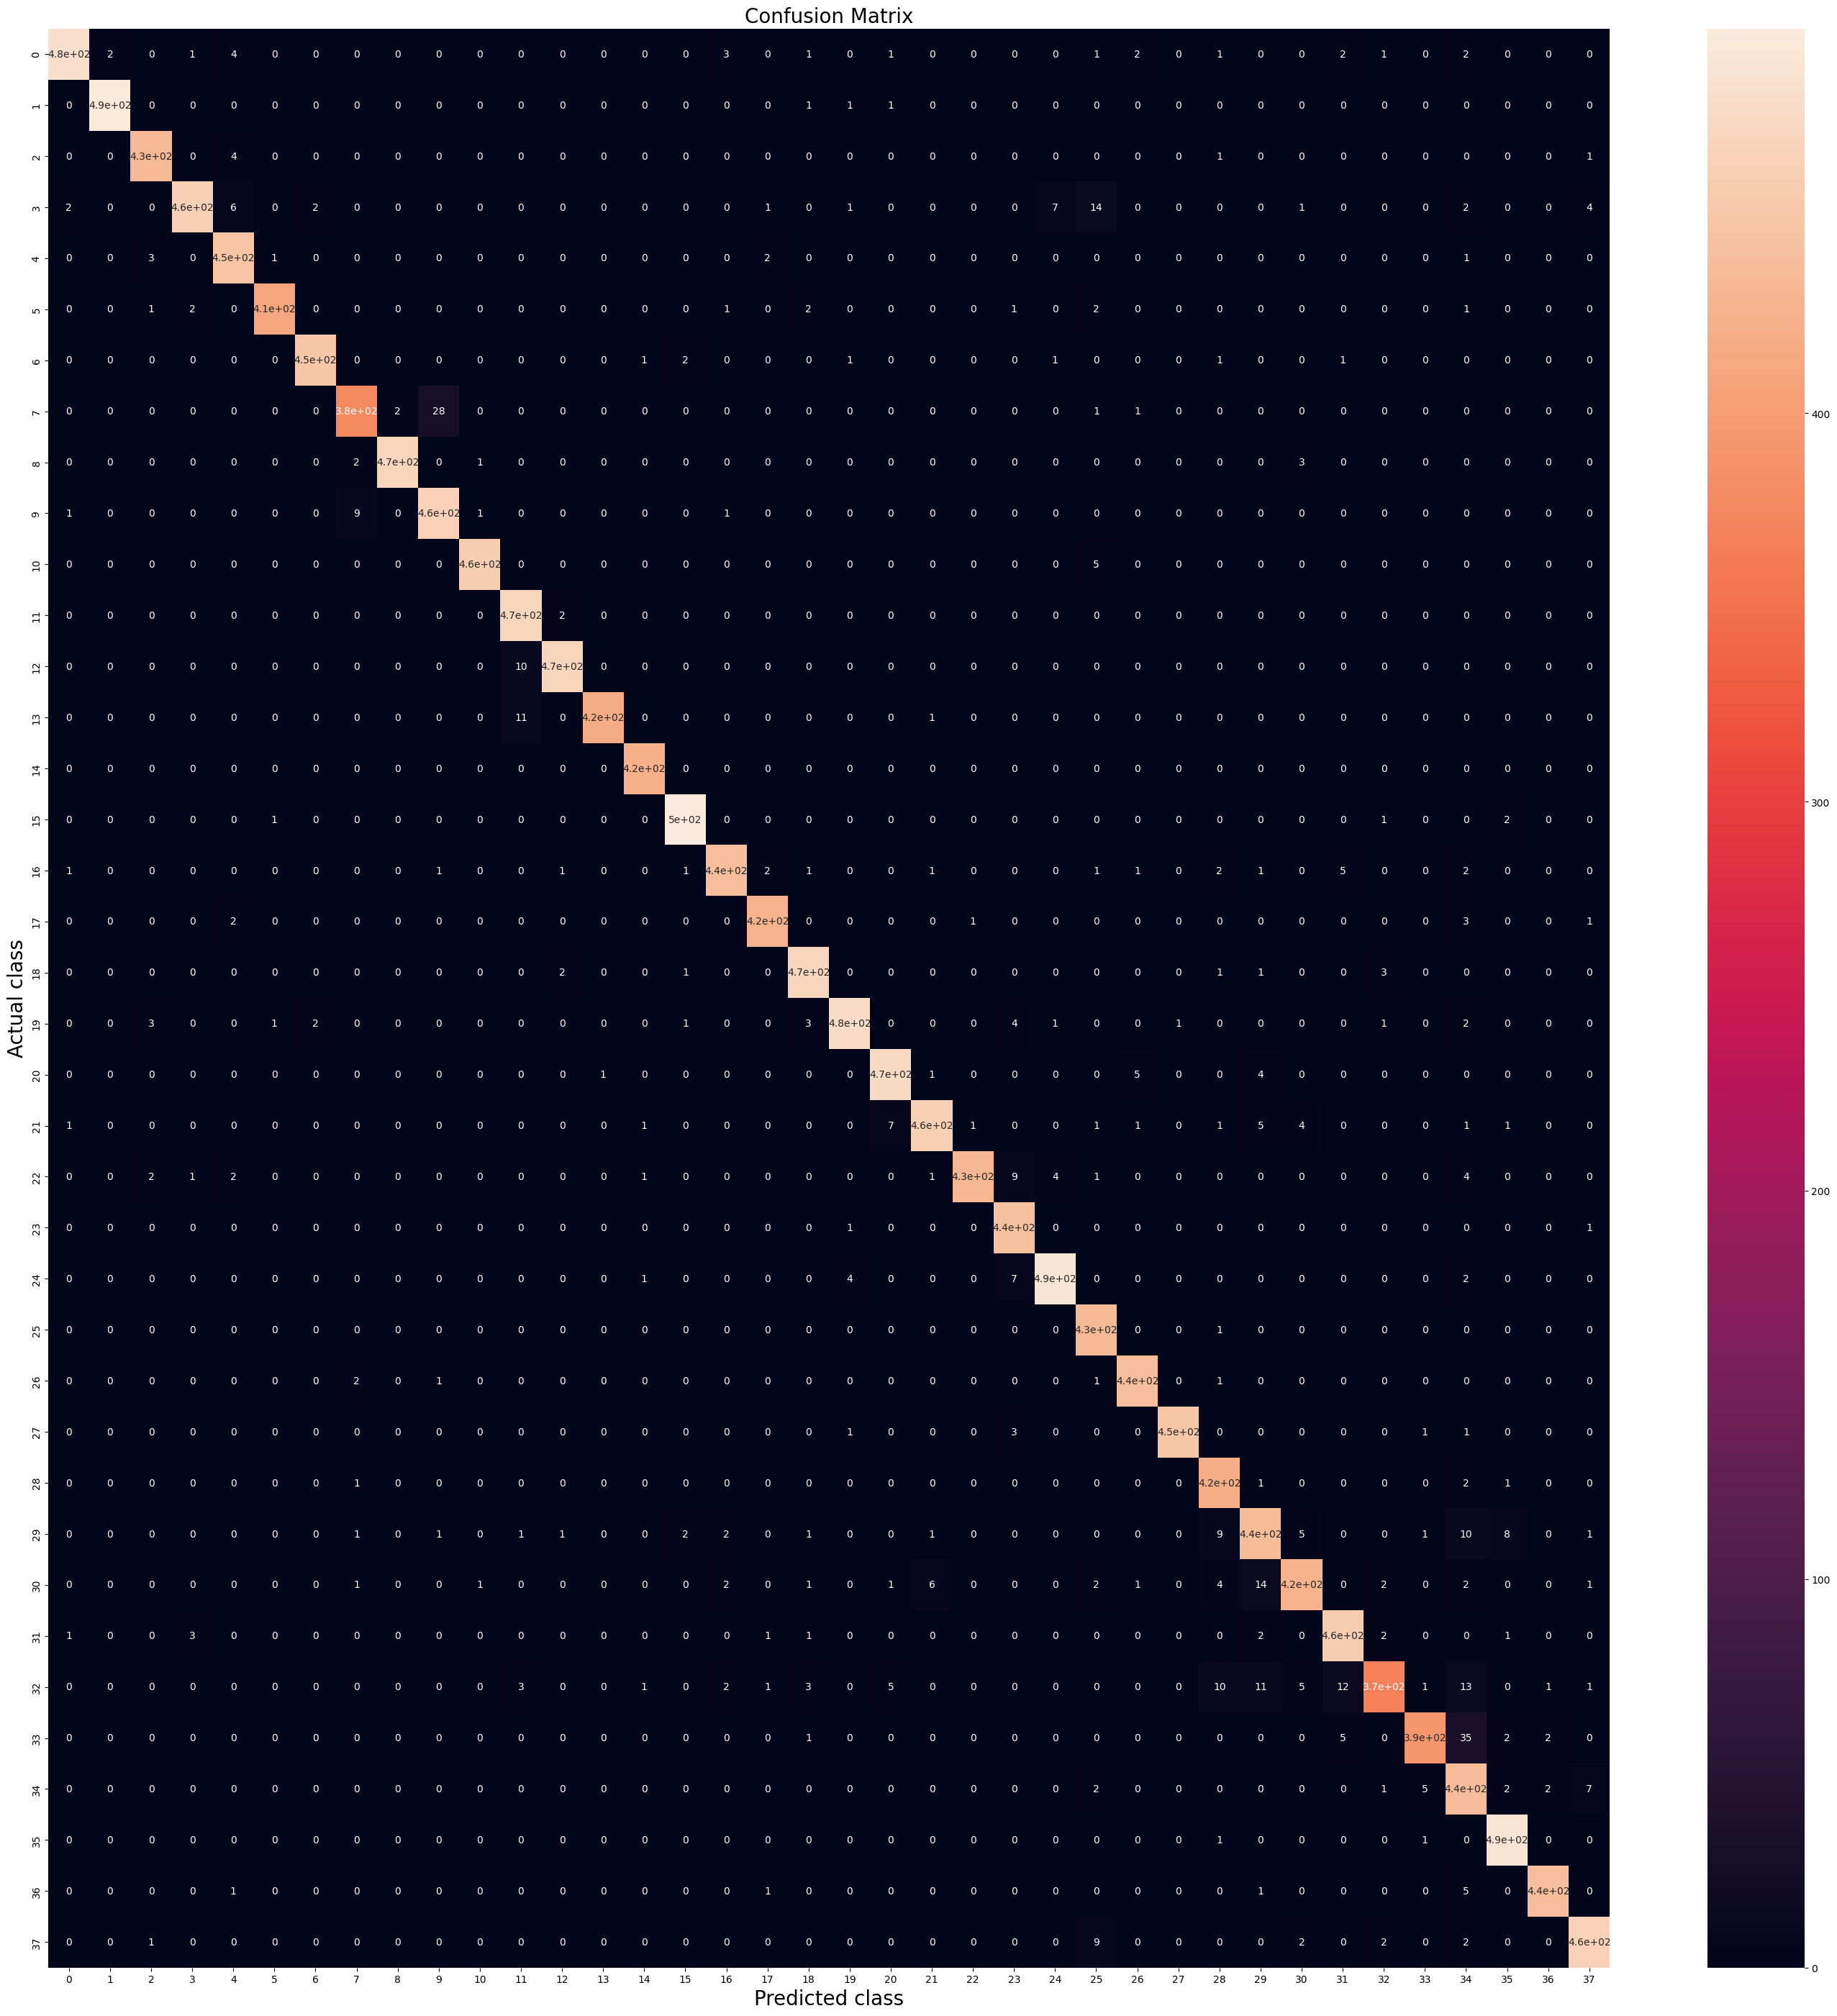

In [36]:
plt.figure(figsize=(35, 35))
sns.heatmap(cn, annot=True, annot_kws={'size':10})
plt.xlabel('Predicted class', fontsize = 20)
plt.ylabel('Actual class', fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

# Visualization

Display Random Training Images

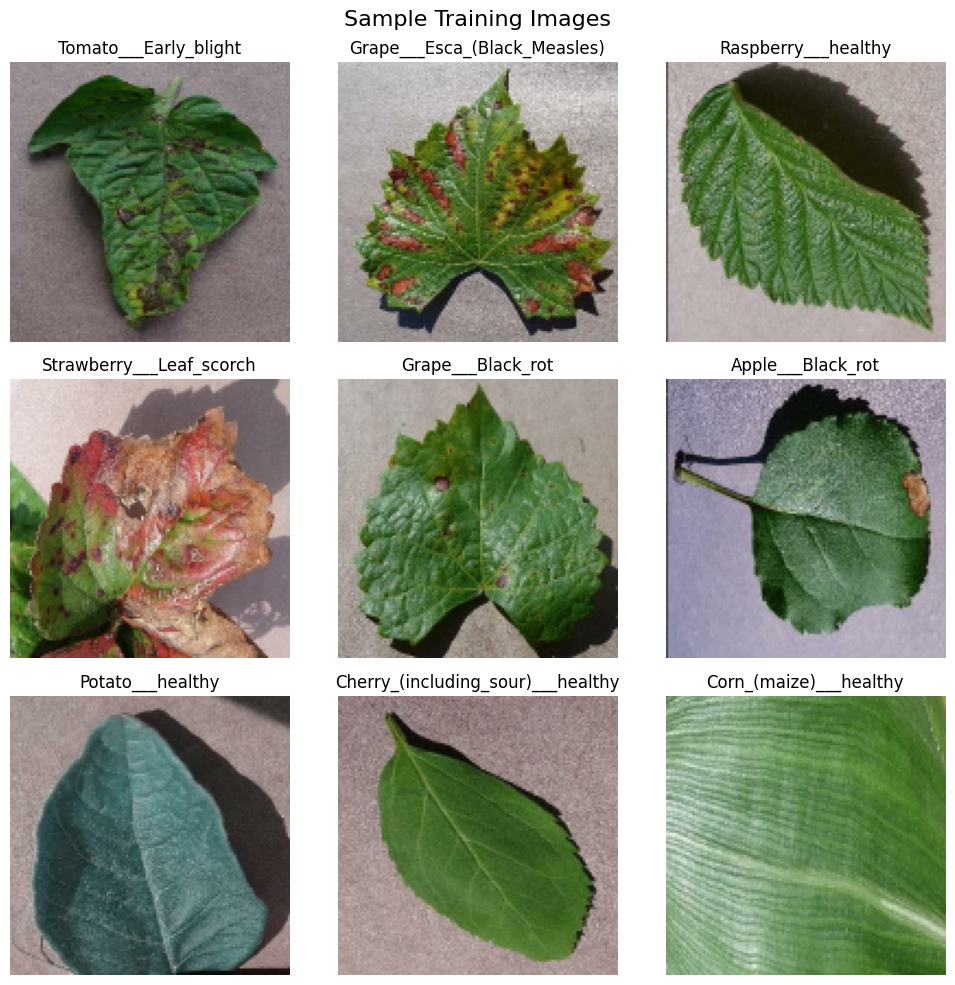

In [37]:
class_names = training.class_names

plt.figure(figsize=(10, 10))
for images, labels in training.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = tf.argmax(labels[i]).numpy()
        plt.title(class_names[label_index])
        plt.axis("off")
plt.suptitle("Sample Training Images", fontsize=16)
plt.tight_layout()
plt.show()

Visualize Data Augmentation Effects

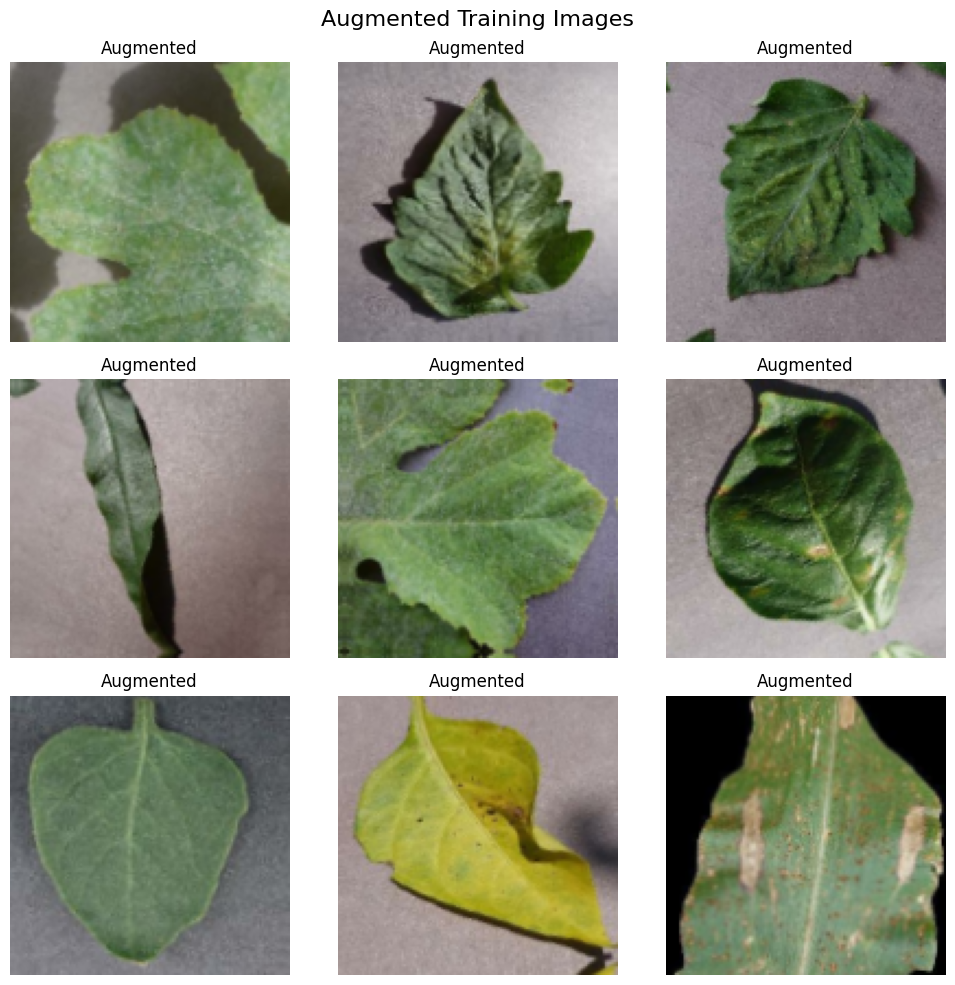

In [38]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

plt.figure(figsize=(10, 10))
for images, _ in training.take(1):
    for i in range(9):
        augmented_img = data_augmentation(images[i:i+1])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_img[0].numpy().astype("uint8"))
        plt.title("Augmented")
        plt.axis("off")
plt.suptitle("Augmented Training Images", fontsize=16)
plt.tight_layout()
plt.show()

Dataset Distribution Bar Chart

/tmp/ipython-input-55-1229009826.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Class', y='Count', palette='viridis')


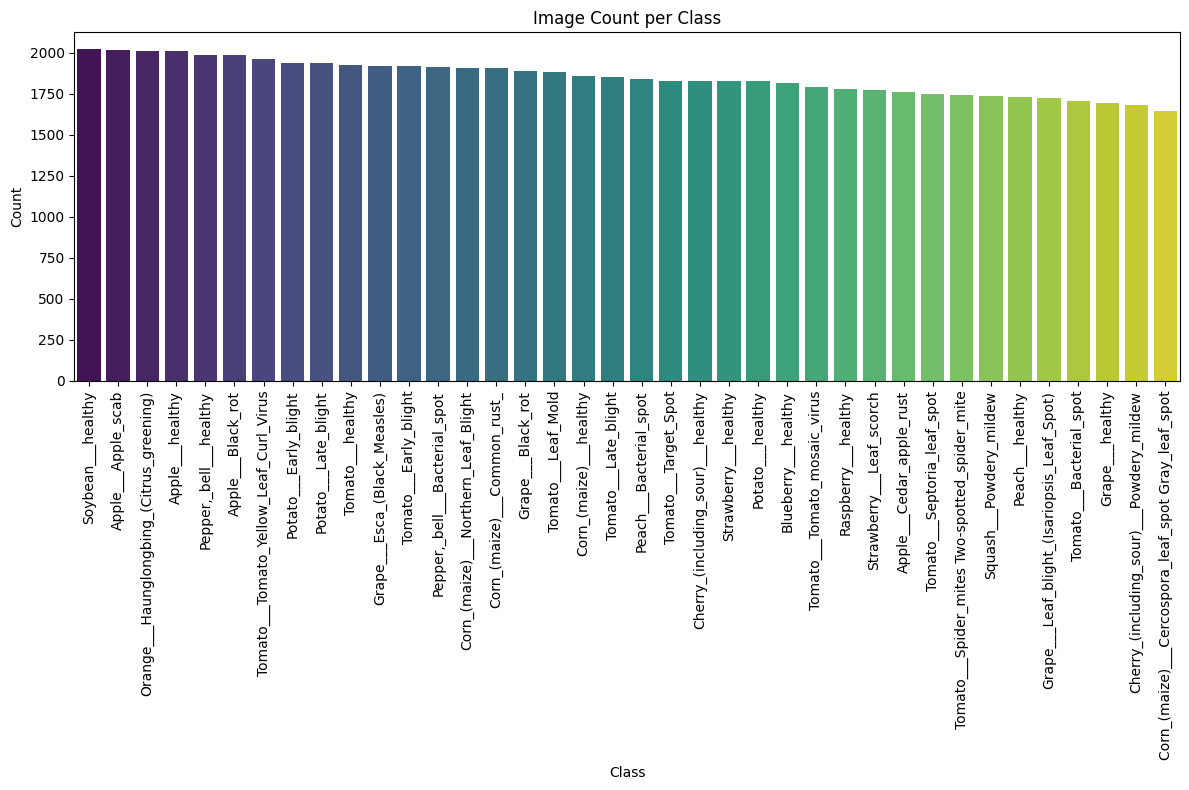

In [55]:
dataset_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

label_counts = {}
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        image_count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        label_counts[class_name] = image_count

df = pd.DataFrame(list(label_counts.items()), columns=['Class', 'Count'])
df = df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Class', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title("Image Count per Class")
plt.tight_layout()
plt.show()

Training/Validation Accuracy and Loss

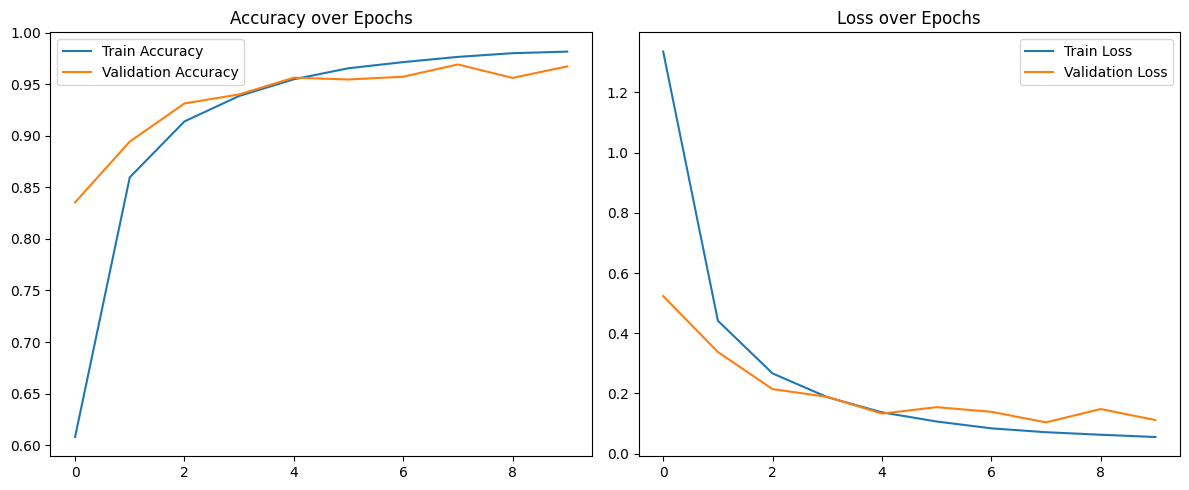

In [58]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(trainingHistory.history['accuracy'], label='Train Accuracy')
plt.plot(trainingHistory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(trainingHistory.history['loss'], label='Train Loss')
plt.plot(trainingHistory.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()
